# Observation Planning for Radio Observations

This worksheet will introduce you to some concepts you'll need to plan out your observations with the radio telescope.

First, we are going to select our observatory.  We will use astroplan plus astropy coordinates.

Import them and confirm they're installed:

In [1]:
from astropy import units as u
from astropy import coordinates
from astroplan import Observer

Next, we set up the observer.

We are going to pick the observer based on the known latitude and longitude of our observatory in Gainesville in [geodetic](https://en.wikipedia.org/wiki/Geographic_coordinate_system) coordinates, meaning we're specifying the location with two angles and one elevation (height above ellipsoid).

This will convert into some coordinate system used internally by astropy.

In [2]:
gainesville_location = coordinates.EarthLocation.from_geodetic(lon=-82.3*u.deg, lat=29.6*u.deg, height=100*u.m)
gainesville_location

<EarthLocation (743674.13504562, -5500332.52750589, 3131946.80724394) m>

We then set up the "observer", which will be used as our reference when looking at the sky.  We specify a time zone so we can use local times.

In [3]:
observer = Observer(gainesville_location, timezone='US/Eastern')
observer

<Observer: location (lon, lat, el)=(-82.3 deg, 29.60000000000001 deg, 100.00000000121652 m),
    timezone=<DstTzInfo 'US/Eastern' LMT-1 day, 19:04:00 STD>>

## Where are we pointed?

Now we can ask some questions: if we point at a specific altitude and azimuth, what's there now?  What's going to be there in 12 hours?

We define "now", but it requires more packages,  ``pytz`` = "python timezone":

In [4]:
import pytz
import datetime
now = pytz.timezone('US/Eastern').localize(datetime.datetime.now())
now

datetime.datetime(2020, 9, 9, 11, 33, 27, 41219, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>)

In [5]:
target = coordinates.AltAz(alt=90*u.deg, az=180*u.deg,
                           location=observer.location,
                           obstime=now).transform_to(coordinates.Galactic)
target

<Galactic Coordinate: (l, b) in deg
    (196.68158805, 43.75838943)>

The "target" variable is now a Galactic coordinate that tells us where we're pointing in the galaxy *right now*.

If we want to know the RA/Dec, we can convert it:

In [6]:
target.transform_to(coordinates.FK5)

<FK5 Coordinate (equinox=J2000.000): (ra, dec) in deg
    (139.90436192, 29.68597823)>

What if we want to predict a future observation?

(specify time formats using https://docs.python.org/3/library/datetime.html)

In [7]:
time = datetime.datetime.strptime('January 1, 2021 4:30:00 AM', "%B %d, %Y %I:%M:%S %p",)
time

datetime.datetime(2021, 1, 1, 4, 30)

In [8]:
target = coordinates.AltAz(alt=90*u.deg, az=180*u.deg,
                           location=observer.location,
                           obstime=time).transform_to(coordinates.Galactic)
target

<Galactic Coordinate: (l, b) in deg
    (179.21642968, -0.02405279)>

You can also change your altitude and azimuth.

## Where is my target (where do I have to point)?

This is the fundamental question all observatories have to answer: given a target at a specific RA, Dec, where do we point?  What altitude and azimuth do we point at?

(the question is easier if you have an equatorial mount, but you still need to know what Right Ascension to point at)

You might want to know: Where do I have to point to see the Galactic Plane at a few different lines of longitude?

The Galactic Plane is simply the circle in Galactic coordinates where the latitude is zero degrees.

In [9]:
target = coordinates.SkyCoord(45*u.deg, 0*u.deg, frame='galactic')

In [10]:
observer.altaz(time=time, target=target)

<SkyCoord (AltAz: obstime=2021-01-01 04:30:00, location=(743674.13504562, -5500332.52750589, 3131946.80724394) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (328.48118696, -44.22204612)>

Using the astroplan "observer", we can find the alt & az of our target at any time.  In the above example, the target has an altitude of -44 degrees: not observable!  

When can we see it?  Let's try 12 hours later...

In [11]:
time = datetime.datetime.strptime('January 1, 2021 4:30:00 PM', "%B %d, %Y %I:%M:%S %p",)
observer.altaz(time=time, target=target)

<SkyCoord (AltAz: obstime=2021-01-01 16:30:00, location=(743674.13504562, -5500332.52750589, 3131946.80724394) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (128.12045283, 62.2074782)>

So if you have the question, "What will I see if I look at the sky right now?", you can answer it - convert alt/az to ra/dec or Galactic coordinates.

If you have the question, "When can I see my target?", you can answer it by converting target coordinates to alt/az at any given time.

Generally, though, you want to know a *range* of times.  Plots help with that.

Let's say we want to plot the observability over the course of a day.  We can use astropy's time for this:

In [12]:
from astropy.time import Time, TimeDelta
atime = Time(time)
atimes = atime + TimeDelta(1*u.h) * np.arange(24)
atimes

<Time object: scale='utc' format='datetime' value=[datetime.datetime(2021, 1, 1, 16, 30)
 datetime.datetime(2021, 1, 1, 17, 30)
 datetime.datetime(2021, 1, 1, 18, 30)
 datetime.datetime(2021, 1, 1, 19, 30)
 datetime.datetime(2021, 1, 1, 20, 30)
 datetime.datetime(2021, 1, 1, 21, 30)
 datetime.datetime(2021, 1, 1, 22, 30)
 datetime.datetime(2021, 1, 1, 23, 30)
 datetime.datetime(2021, 1, 2, 0, 30) datetime.datetime(2021, 1, 2, 1, 30)
 datetime.datetime(2021, 1, 2, 2, 30) datetime.datetime(2021, 1, 2, 3, 30)
 datetime.datetime(2021, 1, 2, 4, 30) datetime.datetime(2021, 1, 2, 5, 30)
 datetime.datetime(2021, 1, 2, 6, 30) datetime.datetime(2021, 1, 2, 7, 30)
 datetime.datetime(2021, 1, 2, 8, 30) datetime.datetime(2021, 1, 2, 9, 30)
 datetime.datetime(2021, 1, 2, 10, 30)
 datetime.datetime(2021, 1, 2, 11, 30)
 datetime.datetime(2021, 1, 2, 12, 30)
 datetime.datetime(2021, 1, 2, 13, 30)
 datetime.datetime(2021, 1, 2, 14, 30)
 datetime.datetime(2021, 1, 2, 15, 30)]>

We can then compute where our target will be (altitude, azimuth) vs time:

In [13]:
altaz = observer.altaz(atimes, target=target)
altaz

<SkyCoord (AltAz: obstime=[datetime.datetime(2021, 1, 1, 16, 30)
 datetime.datetime(2021, 1, 1, 17, 30)
 datetime.datetime(2021, 1, 1, 18, 30)
 datetime.datetime(2021, 1, 1, 19, 30)
 datetime.datetime(2021, 1, 1, 20, 30)
 datetime.datetime(2021, 1, 1, 21, 30)
 datetime.datetime(2021, 1, 1, 22, 30)
 datetime.datetime(2021, 1, 1, 23, 30)
 datetime.datetime(2021, 1, 2, 0, 30) datetime.datetime(2021, 1, 2, 1, 30)
 datetime.datetime(2021, 1, 2, 2, 30) datetime.datetime(2021, 1, 2, 3, 30)
 datetime.datetime(2021, 1, 2, 4, 30) datetime.datetime(2021, 1, 2, 5, 30)
 datetime.datetime(2021, 1, 2, 6, 30) datetime.datetime(2021, 1, 2, 7, 30)
 datetime.datetime(2021, 1, 2, 8, 30) datetime.datetime(2021, 1, 2, 9, 30)
 datetime.datetime(2021, 1, 2, 10, 30)
 datetime.datetime(2021, 1, 2, 11, 30)
 datetime.datetime(2021, 1, 2, 12, 30)
 datetime.datetime(2021, 1, 2, 13, 30)
 datetime.datetime(2021, 1, 2, 14, 30)
 datetime.datetime(2021, 1, 2, 15, 30)], location=(743674.13504562, -5500332.52750589, 31319

We can then plot it....

In [14]:
from astropy import visualization
import pylab as pl
visualization.quantity_support() # only need this once
pl.style.use('dark_background')

Text(0, 0.5, 'Azimuth (deg)')

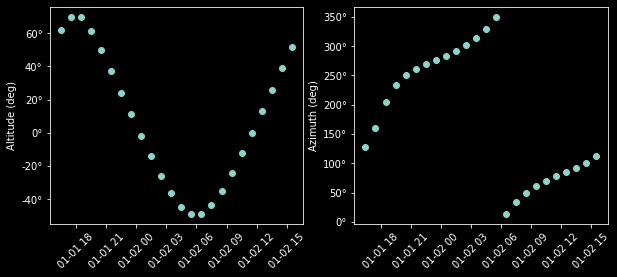

In [15]:
pl.figure(figsize=(10,4))
pl.subplot(1,2,1).plot_date(atimes.plot_date, altaz.alt)
pl.xticks(rotation=45)
pl.ylabel("Altitude (deg)")
pl.subplot(1,2,2).plot_date(atimes.plot_date, altaz.az)
pl.xticks(rotation=45)
pl.ylabel("Azimuth (deg)")

## EXERCISE:

Repeat the above for three locations in the Galactic plane.  Try l=0, l=90, and l=135 degrees.  Can you observe all three locations in the same observing session?